In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cmc_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
Unnamed: 0    1100 non-null int64
24            1100 non-null int64
2             1100 non-null int64
3             1100 non-null int64
3.1           1100 non-null int64
1             1100 non-null int64
1.1           1100 non-null int64
2.1           1100 non-null int64
3.2           1100 non-null int64
0             1100 non-null int64
1.2           1100 non-null int64
dtypes: int64(11)
memory usage: 94.7 KB


## 对应
Wifes_age   24                    int64
Wifes_education  2               int64
Husbands_education  3           int64
Number_of_children_ever_born  3.1  int64
Wifes_religion   1               int64
Wifes_now_working%3F   1.1         int64
Husbands_occupation   2.1         int64
Standard-of-living_index   3.2     int64
Media_exposure     0             int64
Contraceptive_method_used   1.2    int64
dtype: object

### 2.2.2用描述性标签替换标签¶
然后将类别属性的标签替换为描述性标签，而不是原始数字标签。 例如，分别由低，中低，中高和高的描述性标签代替了分别表示低，中低，中高和高的原始妻子的教育数据1、2、3和4。 同样，其他类别属性的数字标签已替换为描述性标签。

In [4]:
df['2'].replace(1,"low",inplace=True)
df['2'].replace(2,"mid low",inplace=True)
df['2'].replace(3,"mid high",inplace=True)
df['2'].replace(4,"high",inplace=True)

df['3'].replace(1,"low",inplace=True)
df['3'].replace(2,"mid low",inplace=True)
df['3'].replace(3,"mid high",inplace=True)
df['3'].replace(4,"high",inplace=True)

df['1'].replace(1, "Islam", inplace=True)
df['1'].replace(0, "Other", inplace=True)

df['1.1'].replace(1, "No", inplace=True)
df['1.1'].replace(0, "Yes", inplace=True)

df['3.2'].replace(1, "low", inplace=True)
df['3.2'].replace(2, "middle low", inplace=True)
df['3.2'].replace(3, "middle high", inplace=True)
df['3.2'].replace(4, "high", inplace=True)

df['0'].replace(0, "bad", inplace=True)
df['0'].replace(1, "good", inplace=True)

df['1.2'].replace(1, "No-use", inplace=True)
df['1.2'].replace(2, "Long-term", inplace=True)
df['1.2'].replace(3, "Short-term", inplace=True)

In [5]:
df

,Unnamed: 0,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,0,44,mid high,high,6,Islam,No,3,high,bad,No-use
1,1,36,mid low,mid high,7,Islam,No,3,middle high,bad,Short-term
2,2,27,mid high,mid high,3,Islam,No,2,middle high,bad,Short-term
3,3,20,mid high,mid high,2,Islam,No,2,middle low,good,Short-term
4,4,29,mid high,high,4,Islam,Yes,1,middle high,bad,No-use
5,5,17,mid low,mid low,0,Islam,Yes,3,middle low,bad,Short-term
6,6,33,mid high,high,3,Other,No,2,high,bad,Long-term
7,7,31,mid high,mid high,2,Islam,Yes,2,middle high,bad,No-use
8,8,46,high,high,4,Islam,No,1,high,bad,Long-term
9,9,34,high,mid high,3,Other,No,2,high,bad,Short-term


### 在数值特征中检查异常值
箱线图是可视化数字属性离群值的最佳方法。 该框捕获了中间50％的数据，该行显示了中间值，图的晶须显示了合理的数据范围。 晶须外的任何点都是异常值的理想选择。 每个数字属性的离群值使用方框图确定，如下所示：

In [6]:
import matplotlib.pyplot as plt
i = 1
df.boxplot(column=['24','3.1'],vert=False,figsize=(7,6))
plt.title("Figure " + str(i) + ": Boxplots of Wife's Age & Number of Children",size=13)
plt.xticks(size=12)
plt.yticks(size=12)

i=i+1

In [7]:
# 分析数据
import seaborn as sns

In [8]:
# 复制数据
df1 = df.copy()

In [9]:
sns.set(color_codes=True)
# 定义画图函数
def BarPlot(x):
    total = float(len(df))
    ax = df[x].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
    
def BoxHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.2, .9)})
    plt.suptitle("Figure " + str(i) + ": Histogram and Box Plot of " + col,size=12)
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()
    

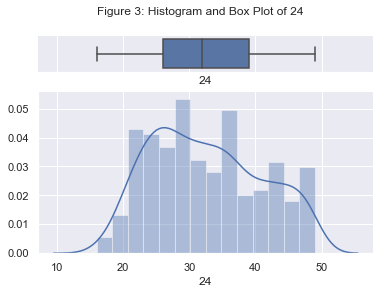

In [12]:
# 年龄与孩子数目关系

BoxHistogramPlot(df['24'])
plt.show()
i+=1

In [13]:
df['24'].describe()

count    1100.000000
mean       32.590909
std         8.298893
min        16.000000
25%        26.000000
50%        32.000000
75%        39.000000
max        49.000000
Name: 24, dtype: float64

#### 分析得出 age 在16~50岁之间    50% 在 32 岁之间

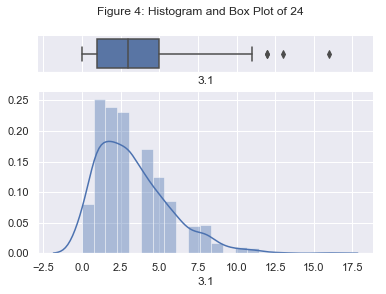

count    1100.000000
mean        3.296364
std         2.356604
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: 3.1, dtype: float64


In [14]:
# 分析孩纸数目所占的比例 3.1
BoxHistogramPlot(df['3.1'])
print(df['3.1'].describe())
plt.show()

#### 孩纸的数目在 0 ~ 16之间  

#### 分类属性的单变量可视化

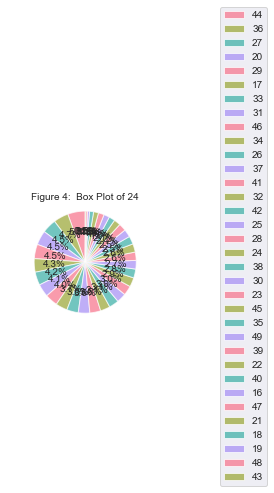

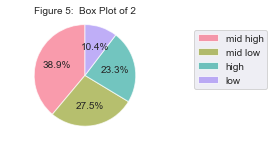

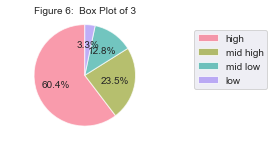

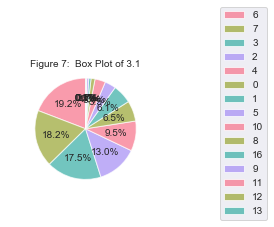

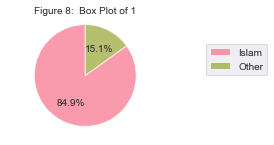

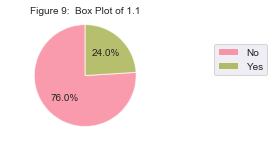

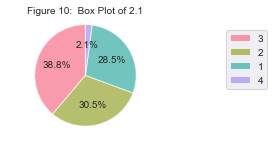

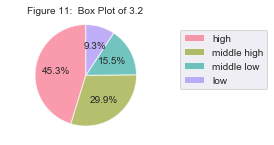

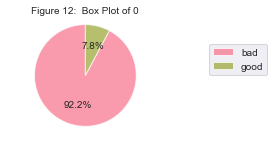

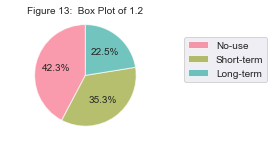

In [15]:
sns.set_palette("husl", 4)
for col in ['24','2','3','3.1','1','1.1','2.1','3.2','0','1.2']:
    df[col].value_counts().plot(kind='pie',fontsize=10,autopct='%.1f%%',
                                pctdistance=0.6, startangle=90,labels=None,
                                wedgeprops={'alpha':0.7,'edgecolor':'white'},
                               figsize=(2, 2))
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(labels=df[col].unique(),bbox_to_anchor=(1.8,0.6), loc="center right", 
               fontsize=10,bbox_transform=plt.gcf().transFigure)
    plt.title('Figure ' + str(i) + ':  Box Plot of ' + col, size=10)
    plt.subplots_adjust(left=0.0, bottom=0.1, right=1)
    plt.show()
    i=i+1

#### 图5显示了数据集中妻子的低（低组合度和中低）和高（高组合度和中高）教育水平。 相比之下，图6显示，在数据集中，丈夫的受教育程度主要较高（组合较高和中等较高为〜85％）。 图7和图8显示，数据集中的大多数妻子分别是伊斯兰教和没有工作的人。 根据图8和图11，生活水平相当高（组合度高和中级度为〜75％），接触媒体的比例超过90％。 

#### 最高比例的低龄和高龄妻子没有使用避孕方法。 相反，比例最高的中年妻子使用的是长期避孕方法，而短期避孕的方法似乎正好根据妻子的年龄分布
#### 大多数生育少于三个孩子的妻子倾向于不使用避孕方法，而大多数生育3-5个孩子的妻子倾向于使用长期避孕方法。 同样，短期方法似乎呈正态分布。

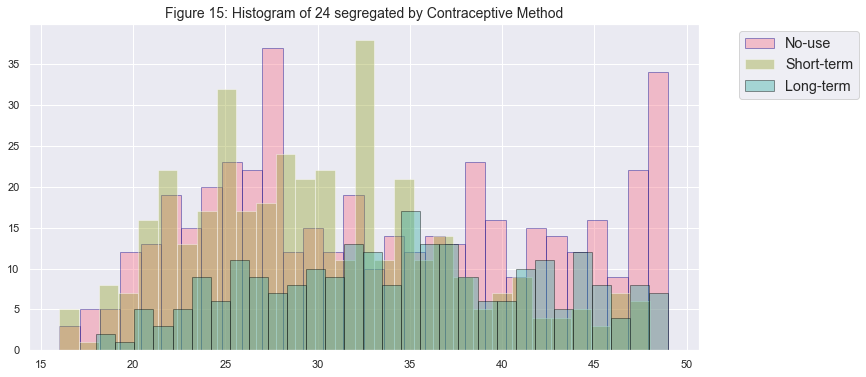

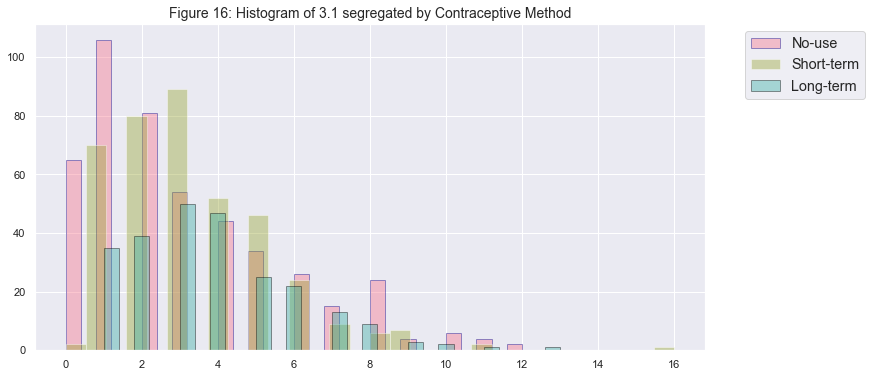

In [17]:
# 画出年龄跟孩子数目之间的数据图
import numpy as np
for col in ['24','3.1']:
    data1 = df.loc[df['1.2']=='No-use',col]
    data2 = df.loc[df['1.2']=="Short-term", col]
    data3 = df.loc[df['1.2']=="Long-term", col]
    plt.figure(figsize=(12,6))
    plt.hist(data1, alpha = 0.4, bins = 30,edgecolor="darkblue")
    plt.hist(data2, alpha = 0.4, bins = 30)
    plt.hist(data3, alpha = 0.4, bins = 30,edgecolor="black")
    plt.title("Figure " + str(i) + ": Histogram of " + col +
              " segregated by Contraceptive Method",size=14)
    i = i + 1
    plt.legend(df['1.2'].unique(), bbox_to_anchor=(1.05, 1), loc=2, 
               borderaxespad=0.5, prop = {'size':'large'})
    plt.show()
    

#### 从第一个密度图中可以看出，在年轻的老年妻子（20至30岁）中，短期避孕方法使用率较高，而在中年妻子中（35至45岁），长期避孕方法使用率较高。年份）。大多数老年妻子（45岁以上）倾向于不使用任何避孕方法。

#### 第二个密度图显示，育有少于两个孩子的妻子大多数不使用避孕方法，育有四个以上孩子的妻子则以相当平等的方式使用长期和短期方法。短期避孕方法似乎在育有2至4岁孩子的妻子中更受欢迎

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


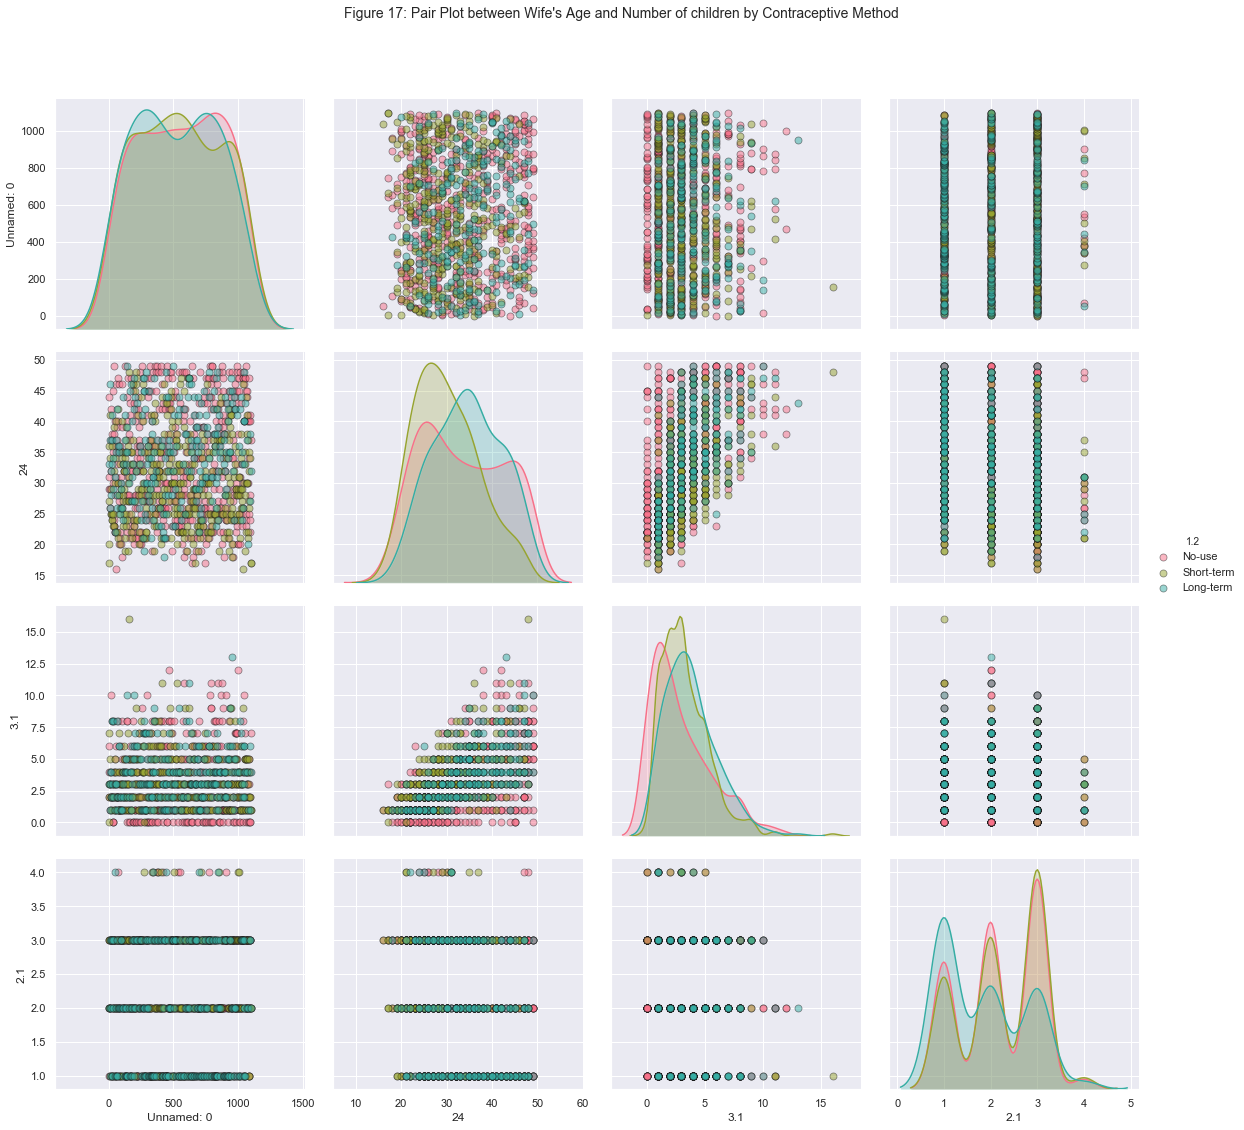

In [18]:
sns.pairplot(df, hue = '1.2', diag_kind = 'kde',
             plot_kws = {'alpha': 0.5, 's': 50, 'edgecolor': 'k'},
             size = 4)
plt.suptitle("Figure " + str(i) +
             ": Pair Plot between Wife's Age and Number of children by Contraceptive Method",
             size = 14, verticalalignment='top')
plt.subplots_adjust(top=0.9)
plt.show()
i=i+1

### 在高学历的妻子中，长期和短期避孕方法被广泛使用，而大多数低学历的妻子则倾向于不使用避孕方法。 从图17和图18可以看出，丈夫的受教育程度和妻子的工作状况似乎与妻子使用的避孕方法没有关系。 同样，其他计数图也未显示类别特征与目标特征的直接相关性。 但是，如果将这些图转换为比例图，则可以获得更好的洞察力。

In [ ]:
wife_age          24
wife_edu          2
husb_edu          3
children          3.1
wife_religion     1
wife-working     1.1
husb-occup        2.1
s-living_index    3.2
media_exp        0
contrac_mthd     1.2
dtype: object

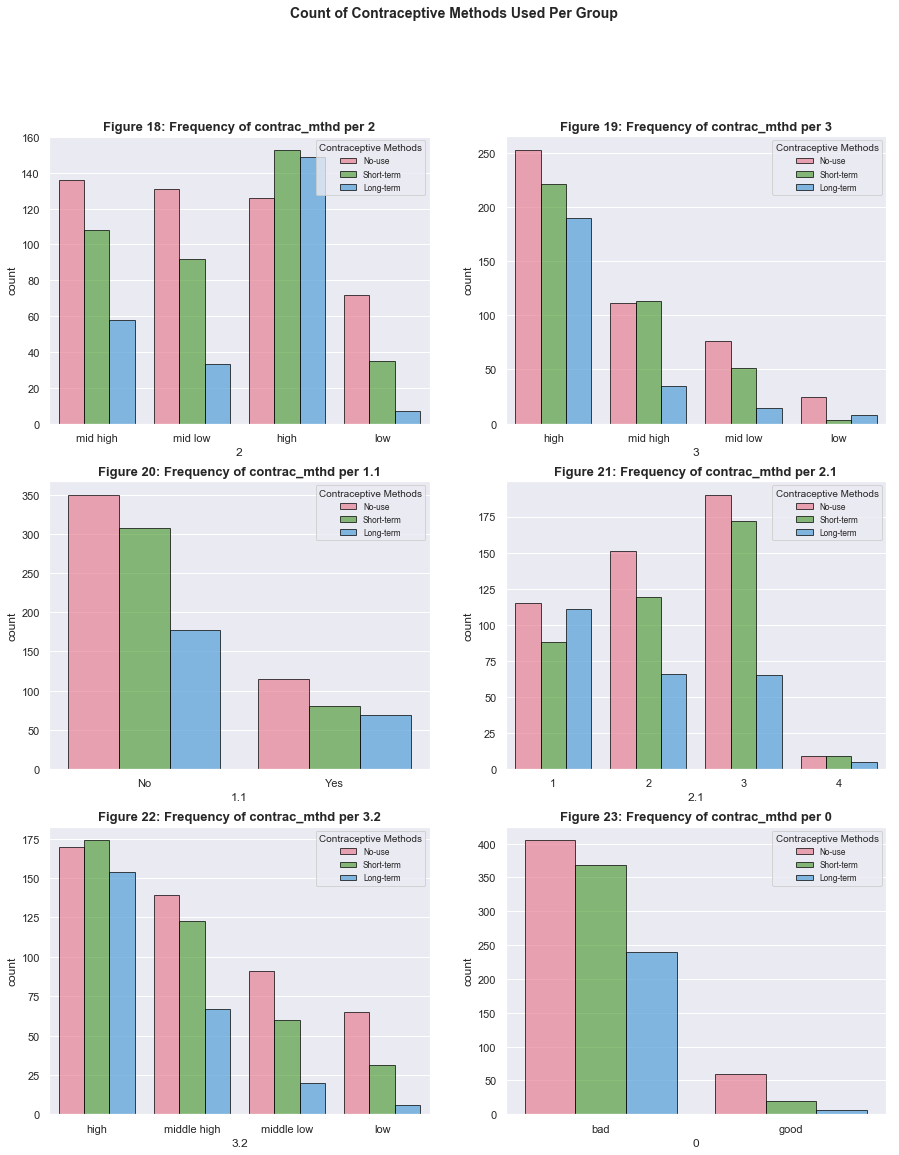

In [21]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(3, 2, figsize=(15,18))
sns.set_palette("husl", 3)


for col, ax in zip(['2', '3', '1.1','2.1','3.2','0'], ax.flatten()):
    sns.countplot(x=col, hue='1.2', data=df, ax=ax,alpha=0.7,edgecolor="black")
    fig.suptitle("Count of Contraceptive Methods Used Per Group", weight='bold', size=14)
    ax.set_title("Figure " + str(i) + ": Frequency of contrac_mthd per " + col,
                 weight='bold', size=13)
    ax.legend(prop = {'size':'x-small'}).set_title('Contraceptive Methods', prop = {'size':'small'})
    i=i+1  

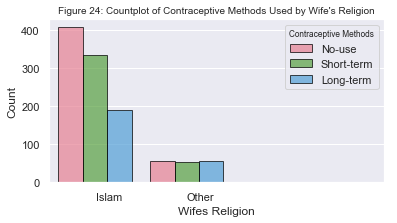

In [22]:
N = 3.5
ind = np.arange(N)  # the x locations for the groups
width = 0.30        # the width of the bars
sns.set(font_scale = 1)
sns.set_palette("husl", 3)
fig = plt.gcf()
fig.set_size_inches( 6, 3)


fig=sns.countplot(x='1',hue='1.2',data=df,alpha=0.7,edgecolor="black")

fig.set_xlabel('Wifes Religion')
fig.set_ylabel('Count')
fig.set_title("Figure " + str(i) +": Countplot of Contraceptive Methods Used by Wife's Religion", size=10)
fig.set_xticks(ind + width / 2)
fig.legend().set_title('Contraceptive Methods', prop = {'size':'x-small'})

i=i+1

#### 未使用避孕方法的妻子比例与妻子和丈夫的教育水平直接相关。夫妻的文化程度越低，不使用避孕方法的比例越高。同样，根据图63，生活水平似乎与目标特征之间具有明显的相关性：这意味着生活水平更高，未使用避孕方法的比例更低。暴露于内侧的避孕方法与所使用的避孕方法之间的关系如图64所示。它还表明，使用短期和长期避孕方法以及暴露于更好的介质的比例有所增加。

#### 数据集中的非伊斯兰教妻子使用长期避孕方法的比例较高，而没有使用避孕方法的比例较低。

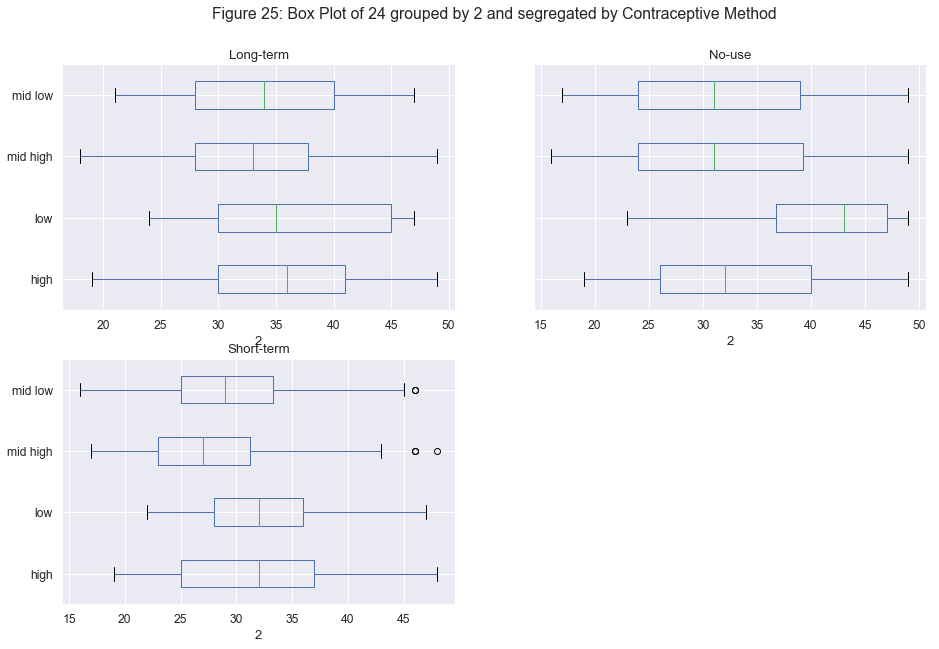

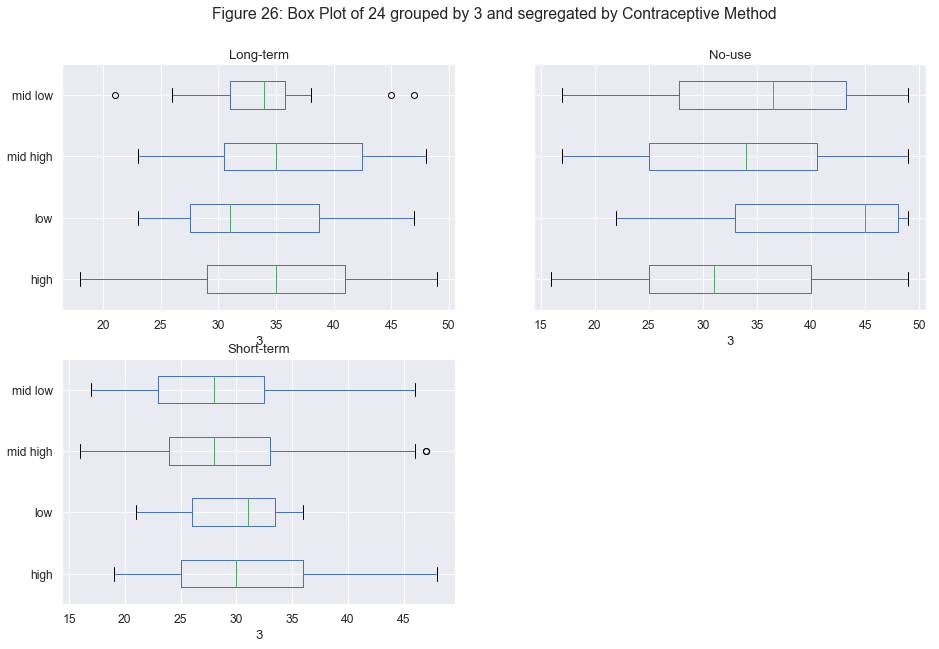

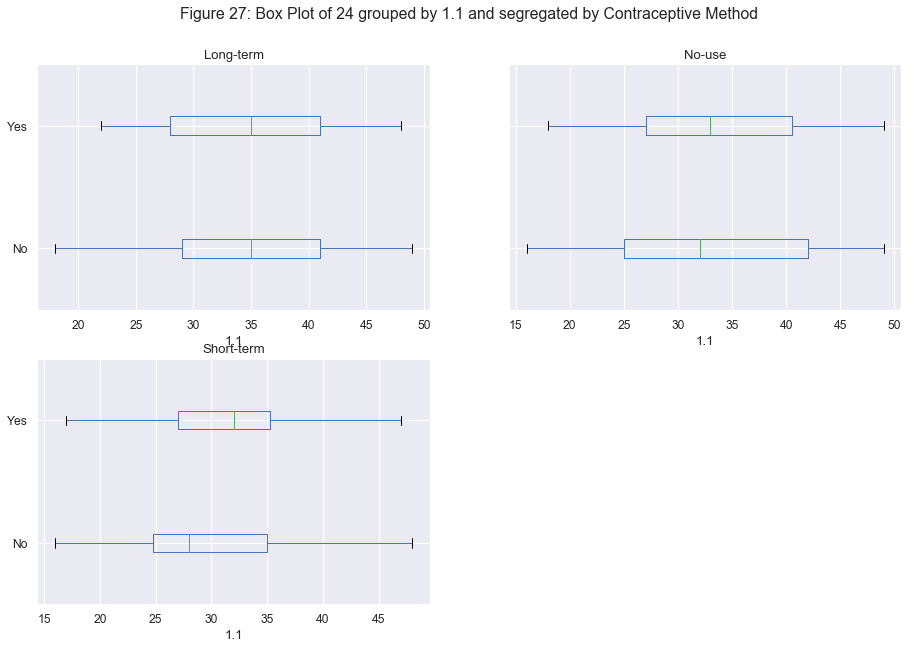

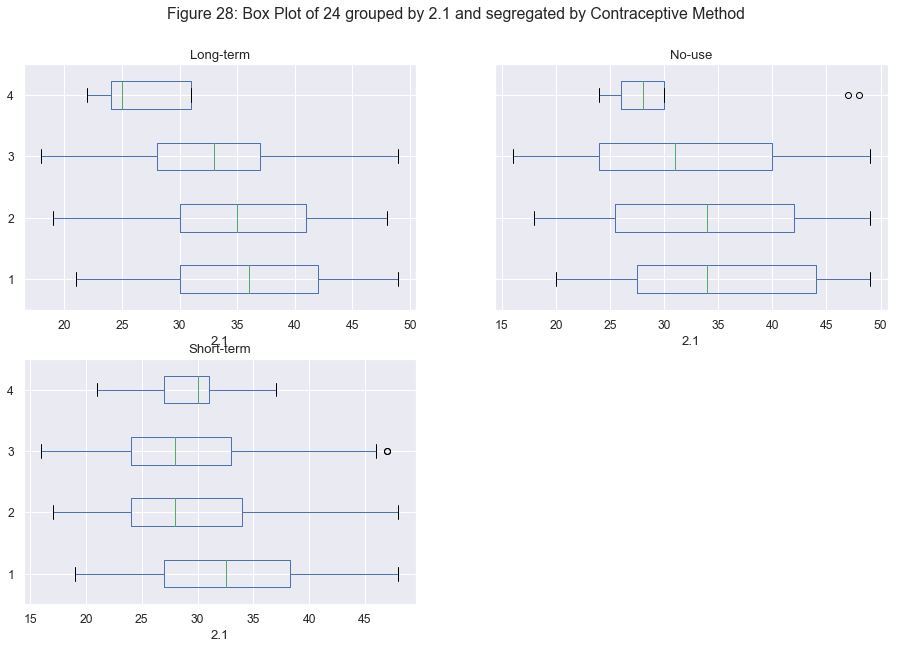

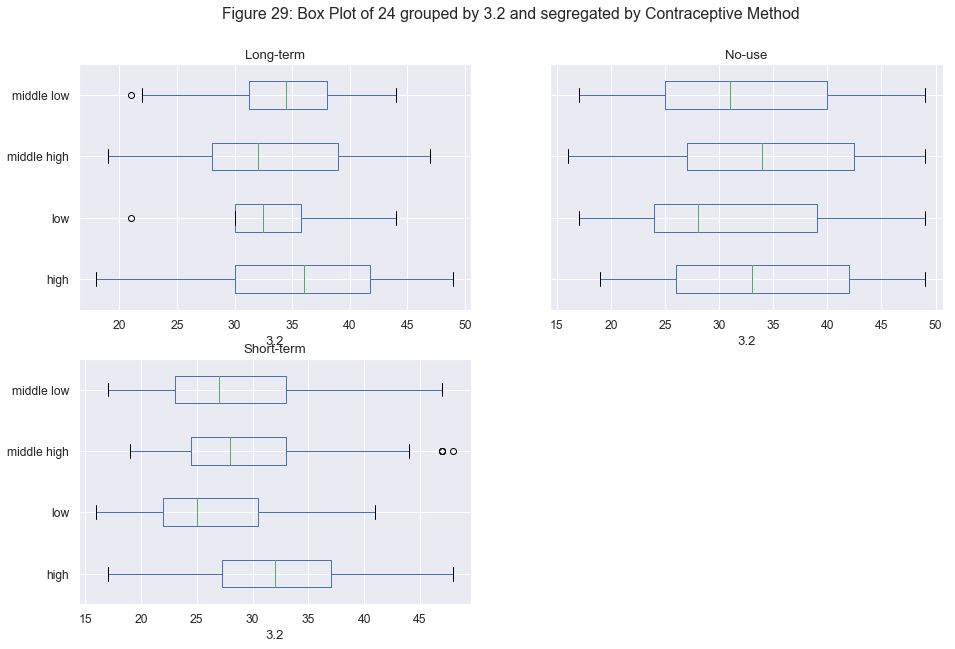

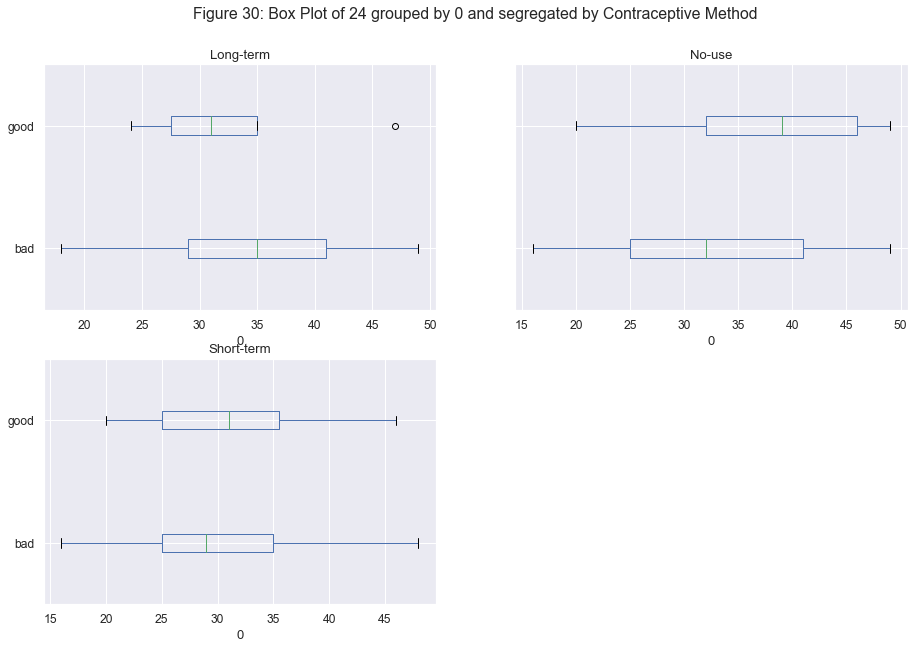

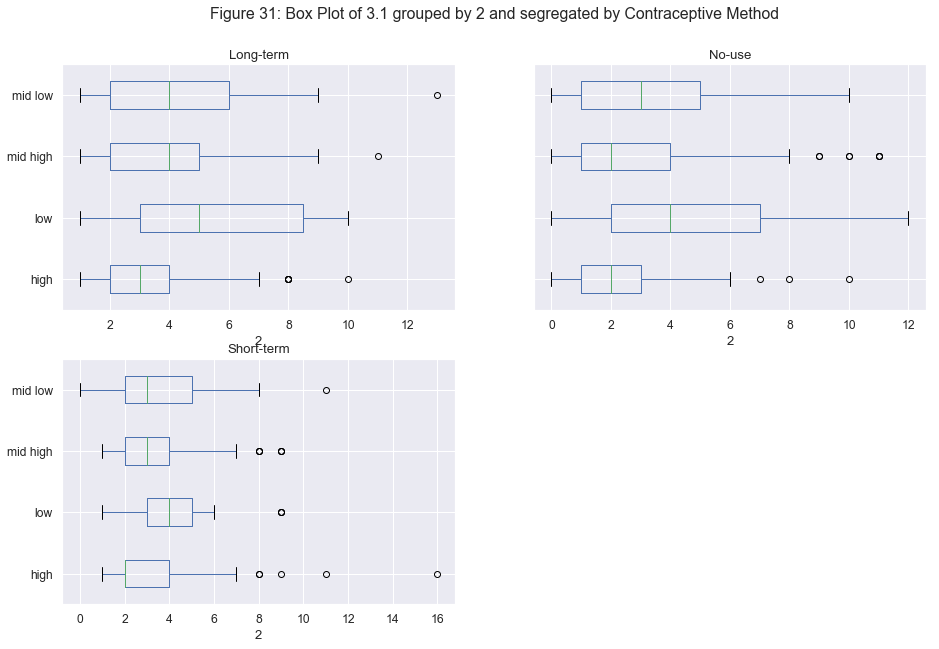

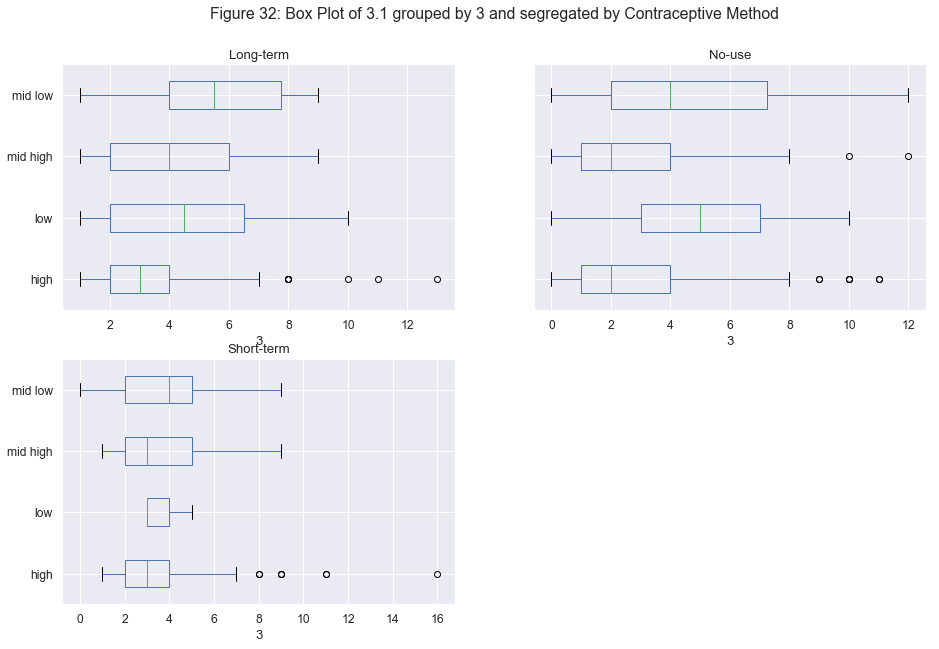

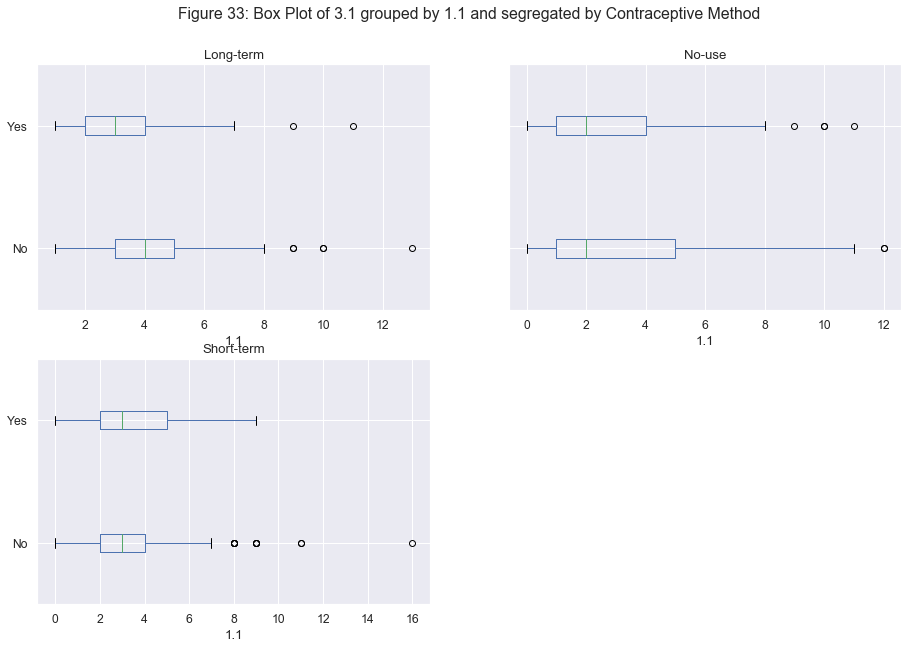

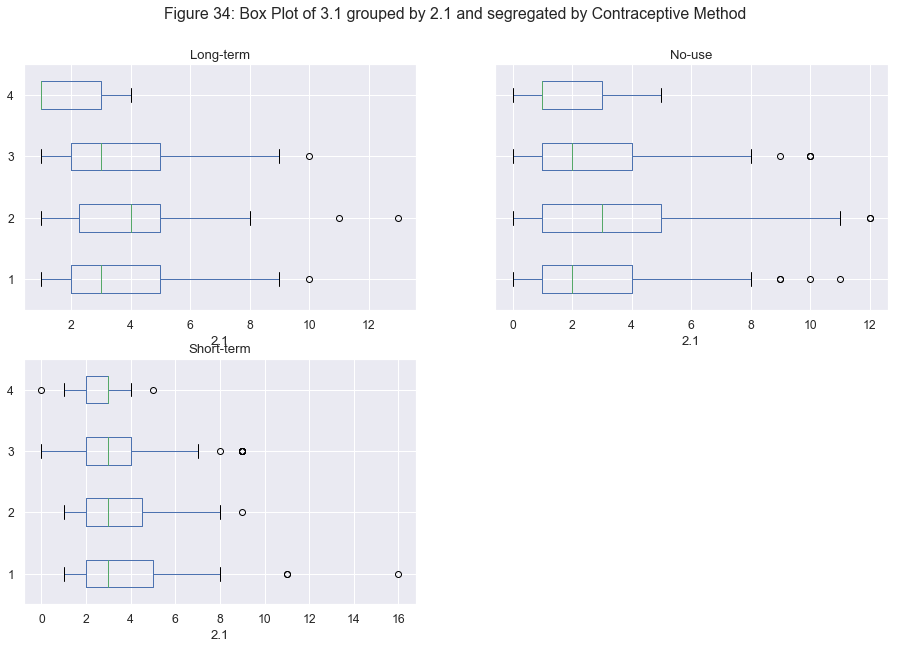

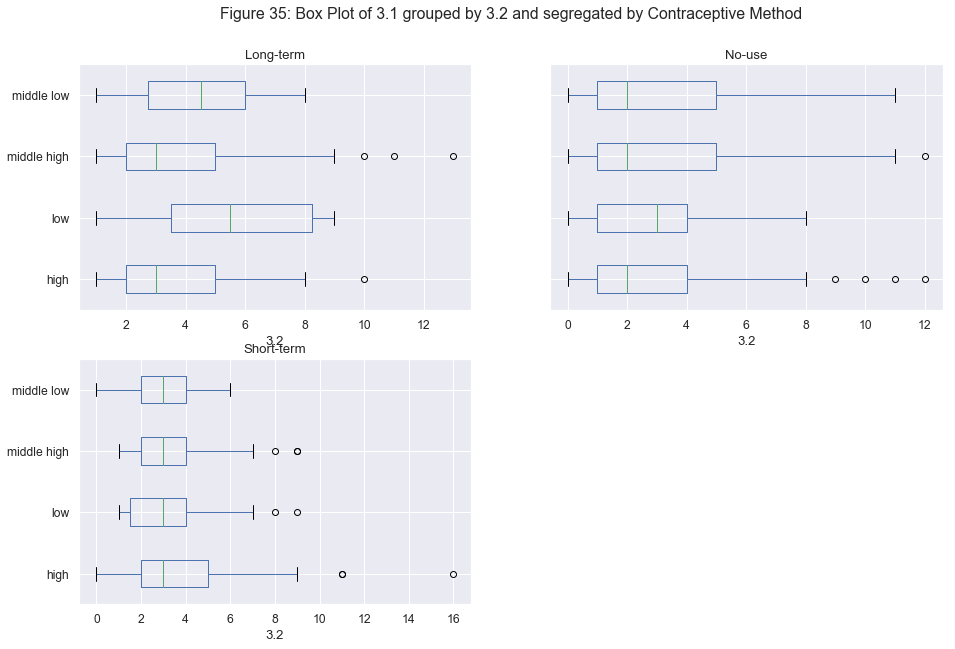

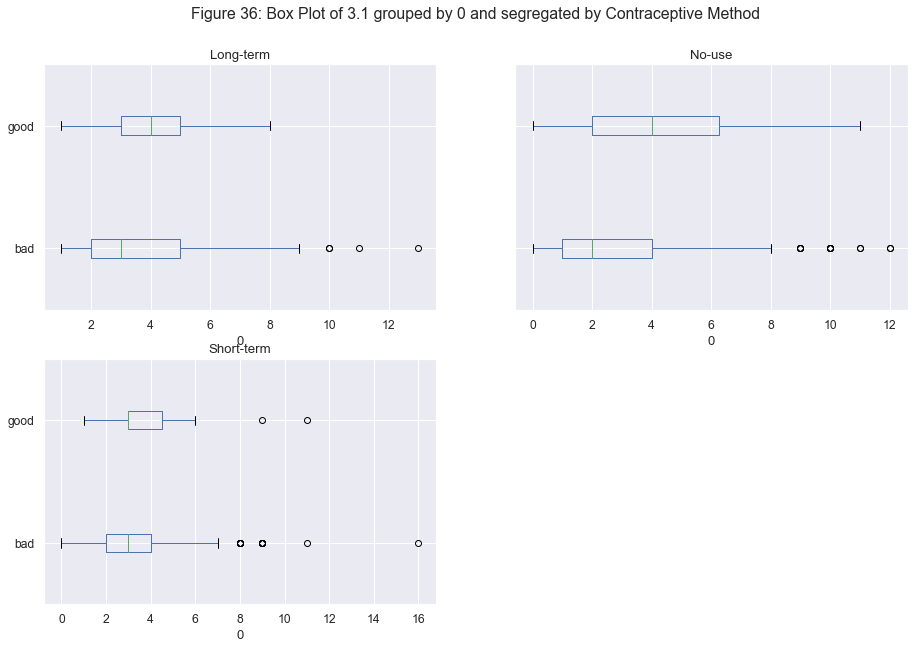

In [23]:
plt.rcParams["font.family"] = "DejaVu Sans"
sns.set(font_scale = 1.1)
for col in ['24','3.1']:
    for k in ['2', '3', '1.1',
              '2.1','3.2','0']:
        ax = df.groupby('1.2').boxplot(column = col, by = k,
                                                vert = False,
                                                
                                                figsize=(15,10))
        plt.suptitle("Figure " + str(i) + ": Box Plot of " + col + " grouped by " + k + 
                     " and segregated by Contraceptive Method"
                    )
        plt.yticks()
        plt.show()
        i = 1 + i

#### 数据
2.0.1.2描述性功能¶
以下是数据集中的描述性功能。

妻子的年龄：数字
妻子的学历：绝对（低，中低，中高，高）
丈夫的教育程度：绝对（低，中低，中高，高）
独生子女数：数字
妻子的宗教：二元（非伊斯兰教，伊斯兰教）
妻子现在在工作吗：二进制文件（是，否）
丈夫的职业：绝对（类别1，类别2，类别3，类别4）
生活水平指数：绝对（低，中低，中高，高）
媒体曝光：二进制（好，坏）
所有描述性特征都是不言自明的。

#### 检查缺失值
*细化妻子的年龄特征
*使用数字整数编码制作序数分类特征
*将数据集分为描述性功能集和目标
*使用一键编码制作名义分类特征
*编码目标
*扩展描述性功能
*使用随机森林重要性（RFI）进行特征选择和排名
*将数据集分为训练集和测试集
*选择评估策略

In [ ]:
# 使用决策树模型
* K最近邻居（KNN）
*（高斯）朴素贝叶斯（NB）
*决策树（DT）

In [ ]:
数据集（即完整数据集）中的所有观察值均已用于建模，以保持70:30的观察值比例用于训练和测试视角。 对于训练集，这减少到1031个观察，而对于测试集，则减少到442个观察。

在建模中使用了流水线技术：首先，考虑了3、4、5，...，9个特征，使用随机森林重要性方法进行了特征选择。 其次，已对每个分类器执行了超参数调整，随后，使用“准确性”方法评估性能。

选择最佳模型后，对测试数据进行5倍交叉验证，并进行配对t检验以确定每个模型对在统计上是否存在显着差异。 另外，使用回忆数据和测试数据的混淆矩阵对模型进行了评估。

In [33]:
df = df.drop(columns=['Unnamed: 0'])
df

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,44,mid high,high,6,Islam,No,3,high,bad,No-use
1,36,mid low,mid high,7,Islam,No,3,middle high,bad,Short-term
2,27,mid high,mid high,3,Islam,No,2,middle high,bad,Short-term
3,20,mid high,mid high,2,Islam,No,2,middle low,good,Short-term
4,29,mid high,high,4,Islam,Yes,1,middle high,bad,No-use
5,17,mid low,mid low,0,Islam,Yes,3,middle low,bad,Short-term
6,33,mid high,high,3,Other,No,2,high,bad,Long-term
7,31,mid high,mid high,2,Islam,Yes,2,middle high,bad,No-use
8,46,high,high,4,Islam,No,1,high,bad,Long-term
9,34,high,mid high,3,Other,No,2,high,bad,Short-term


#### 因为数据没有缺失值
#### 开始处理数据啦

#### 离散数值特征
由于这是分类任务，因此可以假设将数字年龄特征转换为序数变量将导致模型具有更好的性能。 如下所示，“年龄”特征已转换为具有三个级别的序数变量：

In [34]:
contr_df = df.copy()
# qcut:传入参数，要将数据分成多少组，即组的个数，具体的组距是由代码计算
contr_df['24'] = pd.qcut(contr_df['24'], q=3, labels=['young', 'middle-aged', 'old'])
contr_df['24'].value_counts()

young          412
old            355
middle-aged    333
Name: 24, dtype: int64

In [36]:
contr_df.head()

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,3,mid high,4,6,Islam,No,3,high,bad,No-use
1,2,mid low,mid high,7,Islam,No,3,middle high,bad,Short-term
2,1,mid high,mid high,3,Islam,No,2,middle high,bad,Short-term
3,1,mid high,mid high,2,Islam,No,2,middle low,good,Short-term
4,2,mid high,4,4,Islam,Yes,1,middle high,bad,No-use


#### 将有序分类特征数值化（使用整数编码）¶
为了在Scikit-Learn函数中使用数据集，数据集中的所有描述性属性（包括目标特征和描述性特征）都需要转换为数字特征。 整数编码已针对以下顺序分类特征完成。 值得一提的是，此数据集中的“ wife_edu”，“ husd_edu”，“ husb-occup”，“ s-livinh_index”和“ media_exp”确实具有自然顺序，因此应将其视为序数变量。

In [47]:
contr_df=pd.read_csv('cmc_train.csv')
contr_df = contr_df.drop(columns=['Unnamed: 0'])
contr_df.head()

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,44,3,4,6,1,1,3,4,0,1
1,36,2,3,7,1,1,3,3,0,3
2,27,3,3,3,1,1,2,3,0,3
3,20,3,3,2,1,1,2,2,1,3
4,29,3,4,4,1,0,1,3,0,1


In [48]:
# 对年龄进行划分
contr_df['24'] = pd.qcut(contr_df['24'], q=3, labels=['young', 'middle-aged', 'old'])

In [50]:
contr_df['24'].replace('young',1,inplace=True)
contr_df['24'].replace('middle-aged',2,inplace=True)
contr_df['24'].replace('old',3,inplace=True)

In [52]:
# 对宗教进行划分
contr_df['1'].replace(1, "Islam", inplace=True)
contr_df['1'].replace(0, "Other", inplace=True)

In [54]:
# 对妻子是否工作
contr_df['1.1'].replace(1, "No", inplace=True)
contr_df['1.1'].replace(0, "Yes", inplace=True)

In [56]:
contr_df.head()

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,3,3,4,6,Islam,No,3,4,0,1
1,2,2,3,7,Islam,No,3,3,0,3
2,1,3,3,3,Islam,No,2,3,0,3
3,1,3,3,2,Islam,No,2,2,1,3
4,2,3,4,4,Islam,Yes,1,3,0,1


In [57]:
contr_df_cat = contr_df.copy()
#Splitting data-set into the set of descriptive features and the target
Data = contr_df_cat.drop(columns = '1.2')
target = contr_df_cat['1.2']

# Checking the count of instances in each label
target.value_counts()

1    465
3    388
2    247
Name: 1.2, dtype: int64

#### 将数据集分为描述性功能集和目标集¶
在对目标特征进行编码之前，需要将数据集分为描述性特征和目标特征。 然后，检查目标特征以查看每个标签的分布。 如下所示，“不使用”，“短期”和“长期”的目标特征分别具有629、511和333个实例。

#### 
将名义分类特征数字化（使用一键编码）¶(热编码)
在数据集中，“ wife_religion”和“ wife-working”属性被视为名义变量，因为它们不具有自然顺序。 单热编码方法已用于将这些标称变量转换为数值。

In [58]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()
categorical_cols

['1', '1.1']

#### 对于两级分类特征，将drop_first选项设置为“ True”以将变量编码为0或1的单列。如果存在具有两个以上级别的序数分类特征，则Data = pd.get_dummies（Data）函数 可以使用。

In [59]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

In [60]:
Data

,24,2,3,3.1,1,1.1,2.1,3.2,0
0,3,3,4,6,0,0,3,4,0
1,2,2,3,7,0,0,3,3,0
2,1,3,3,3,0,0,2,3,0
3,1,3,3,2,0,0,2,2,1
4,2,3,4,4,0,1,1,3,0
5,1,2,2,0,0,1,3,2,0
6,2,3,4,3,1,0,2,4,0
7,2,3,3,2,0,1,2,3,0
8,3,4,4,4,0,0,1,4,0
9,2,4,3,3,1,0,2,4,0


In [61]:
target.head()

0    1
1    3
2    3
3    3
4    1
Name: 1.2, dtype: int64

#### 扩展描述性功能¶
执行特征缩放（标准化）以将高度变化的数值数据转换为通用缩放。 尽管缩放仅对某些模型（例如KNN，深度学习和SVM）至关重要，但仍强烈建议对任何模型进行缩放。 因此，此任务中使用了Min-Max Scaling，可以将数值数据转换为0到1之间的通用比例。

In [62]:
from sklearn import preprocessing

#Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)
# MinMaxScaler(最小最大值标准化)
Data

array([[1.        , 0.66666667, 1.        , ..., 0.66666667, 1.        ,
        0.        ],
       [0.5       , 0.33333333, 0.66666667, ..., 0.66666667, 0.66666667,
        0.        ],
       [0.        , 0.66666667, 0.66666667, ..., 0.33333333, 0.66666667,
        0.        ],
       ...,
       [1.        , 0.66666667, 1.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.66666667, ..., 0.33333333, 1.        ,
        0.        ],
       [0.        , 0.66666667, 0.66666667, ..., 0.33333333, 1.        ,
        0.        ]])

#### 功能选择和排名¶
在本节中，已使用随机森林重要性（RFI）检查了该数据集的最佳6个功能，以快速了解每个功能的重要性。 但是，在管道内部的超参数调整阶段，使用RFI以更系统和详细的方式执行特征选择，最终确定每个分类器的最佳特征数。

#### 使用RFI（随机森林重要性）选择数据集中最好的6个特征

In [63]:
from sklearn.ensemble import RandomForestClassifier
num_features = 6
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = contr_df_cat.columns[fs_indices_rfi].values
best_features_rfi

array(['3.1', '3.2', '2', '2.1', '24', '3'], dtype=object)

##### ~
* array(['children', 's-living_index', 'wife_edu', 'husb-occup', 'wife_age',
       'husb_edu'], dtype=object)

#### 模型rfi功能重要性

In [64]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi
# array([0.32111791, 0.12688624, 0.11956485, 0.1148184 , 0.0992693 ,0.0890704 ])

array([0.32111791, 0.12688624, 0.11956485, 0.1148184 , 0.0992693 ,
       0.0890704 ])

In [67]:
# 画出随机各个特征的重要性
import altair as alt
alt.renderers.enable('notebook')

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

#plotting
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

ModuleNotFoundError: No module named 'pandas.core.computation.expressions'

alt.Chart(...)

##### 根据上面的结果，数据集的最佳6个功能是“儿童”，“ s-living_index”，“ wife_edu”，“ husb-occup”，“ wife_age”和“ husb_edu”。

#### 将数据分为训练集和测试集

不需要数据采样，因为原始数据集并不是一个很大的数据集：该数据集只有1473个观测值。
如下所示，该模型已经在1031行训练数据上进行了训练和调整，并在442行测试数据上进行了测试。 这是由数据集中训练与测试观察的比率为70:30构成的。